<a href="https://colab.research.google.com/github/avilaJorge/CSE253_FinalProject/blob/master/DeepFakeDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !rm -R ./Logistic_Regression/*
# !mkdir Linear_Regression
# !rm -R ./sample_data

In [ ]:
!cp *.py /content/drive/My\ Drive/CSE\ 253/PA5/PyFiles
!cp *.ipynb /content/drive/My\ Drive/CSE\ 253/PA5/PyFiles

In [ ]:
# !wget https://storage.googleapis.com/img-hosting-bucket/Faces_HQ.hdf5

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Mar 15 12:52:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 418.88                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 107...  Off  | 00000000:08:00.0 Off |                  N/A |
| 27%   27C    P8     5W / 180W |      0MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
%run DeepFake_Dataloader.py
%run utils.py

In [3]:
# imports pytorch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Numpy, Matplotlib, and PIL
import numpy as np
import matplotlib.pyplot as plt

# K-means import
!pip install pykeops --user
from pykeops.torch import LazyTensor
!pip install kmeans-pytorch --user
from kmeans_pytorch import kmeans

# general imports
import pprint

# My imports
from DeepFake_Dataloader import get_dataloaders
from models import LinearRegression, save_model, SVM, KMeans
from utils import RunningAverage
from train import train, evaluate

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
trn_dl, val_dl, tst_dl = get_dataloaders(dataset=DeepFakeHDF5Dataset())

In [14]:
a = dict(trn_dl)
kk = list(a.keys())
kk[1].shape
nn = int(kk[1].shape[1]/3)
print(nn)

60


In [8]:
s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'LogisticRegressionModel'
path         = './results/'

lr_model = LinearRegression(182).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))

In [9]:

train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid())

Epoch:  1
Training loss: 0.5404


Training Loss:  0.4965
Training accuracy: 76.3513%


Validation Loss:  0.4927
Validation accuracy: 76.3917%
"Best Loss": 0.4927056162281239

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.5006


Training Loss:  0.4988
Training accuracy: 76.0541%


Validation Loss:  0.4923
Validation accuracy: 76.7417%
"Best Loss": 0.4922910006122386

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.4899


Training Loss:  0.5067
Training accuracy: 74.3625%


Validation Loss:  0.5077
Validation accuracy: 74.1417%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.4876


Training Loss:  0.4762
Training accuracy: 77.7068%


Validation Loss:  0.4713
Validation accuracy: 78.1750%
"Best Loss": 0.47133427794943467

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.4815


Training Loss:  0.481
Training accuracy: 76.7457%


Validation Loss:  0.48
Validation accuracy: 76.7000%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.4789


Training Loss:  0.4756
Training accuracy: 77.2957%


Validation Loss:  0.473
Validation accuracy: 77.6917%
Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.4737


Training Loss:  0.4708
Training accuracy: 78.0012%


Validation Loss:  0.4657
Validation accuracy: 78.0917%
"Best Loss": 0.46572185894276236

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.4732


Training Loss:  0.4588
Training accuracy: 78.5484%


Validation Loss:  0.4561
Validation accuracy: 78.9833%
"Best Loss": 0.4560878257802192

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.4696


Training Loss:  0.4941
Training accuracy: 76.6819%


Validation Loss:  0.4872
Validation accuracy: 77.3917%
Validation Loss has gone up 1 times.



Epoch:  10
Training loss: 0.4694


Training Loss:  0.4709
Training accuracy: 77.4846%


Validation Loss:  0.4696
Validation accuracy: 77.5167%
Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.4686


Training Loss:  0.4864
Training accuracy: 75.9041%


Validation Loss:  0.4866
Validation accuracy: 75.9250%
Validation Loss has gone up 1 times.



Epoch:  12
Training loss: 0.4581


Training Loss:  0.4876
Training accuracy: 76.9041%


Validation Loss:  0.4807
Validation accuracy: 77.6167%
Validation Loss has gone up 0 times.



Epoch:  13
Training loss: 0.4596


Training Loss:  0.4458
Training accuracy: 79.2650%


Validation Loss:  0.4447
Validation accuracy: 79.3667%
"Best Loss": 0.44465108310922663

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.4647


Training Loss:  0.4646
Training accuracy: 78.3984%


Validation Loss:  0.4579
Validation accuracy: 78.9417%
Validation Loss has gone up 1 times.



Epoch:  15
Training loss: 0.4594


Training Loss:  0.4652
Training accuracy: 77.4790%


Validation Loss:  0.4658
Validation accuracy: 77.4417%
Validation Loss has gone up 2 times.



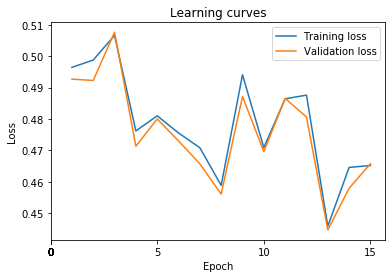

In [11]:
epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [12]:
test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.5,
         predicter=torch.nn.Sigmoid(),
         validation=False)

Validation Loss:  0.4624
Validation accuracy: 77.4750%


0.46236247268128905

Epoch:  1
Training loss: 0.6247


Training Loss:  0.6076
Training accuracy: 68.1434%


Validation Loss:  0.6024
Validation accuracy: 68.3667%
"Best Loss": 0.6023653732969405

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.6109


Training Loss:  0.6089
Training accuracy: 68.5545%


Validation Loss:  0.6017
Validation accuracy: 68.9917%
"Best Loss": 0.6017010744581832

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6086


Training Loss:  0.6124
Training accuracy: 66.0047%


Validation Loss:  0.6104
Validation accuracy: 66.0583%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.6068


Training Loss:  0.6114
Training accuracy: 66.0130%


Validation Loss:  0.6091
Validation accuracy: 66.1667%
Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.6099


Training Loss:  0.6045
Training accuracy: 67.7462%


Validation Loss:  0.6
Validation accuracy: 67.7417%
"Best Loss": 0.5999640790705986

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.606


Training Loss:  0.6032
Training accuracy: 68.2962%


Validation Loss:  0.5984
Validation accuracy: 68.3083%
"Best Loss": 0.5984337596183126

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.6081


Training Loss:  0.6057
Training accuracy: 67.2935%


Validation Loss:  0.6021
Validation accuracy: 67.0667%
Validation Loss has gone up 1 times.



Epoch:  8
Training loss: 0.607


Training Loss:  0.6022
Training accuracy: 68.5629%


Validation Loss:  0.5979
Validation accuracy: 68.5500%
"Best Loss": 0.5978994172938322

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.6057


Training Loss:  0.6077
Training accuracy: 68.7712%


Validation Loss:  0.6001
Validation accuracy: 69.2667%
Validation Loss has gone up 1 times.



Epoch:  10
Training loss: 0.6051


Training Loss:  0.6028
Training accuracy: 67.9546%


Validation Loss:  0.5997
Validation accuracy: 67.7500%
Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.6061


Training Loss:  0.6036
Training accuracy: 68.7767%


Validation Loss:  0.5978
Validation accuracy: 68.9500%
"Best Loss": 0.5978322333477913

Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.6042


Training Loss:  0.6181
Training accuracy: 65.0464%


Validation Loss:  0.618
Validation accuracy: 65.1750%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.6059


Training Loss:  0.6014
Training accuracy: 68.6740%


Validation Loss:  0.5954
Validation accuracy: 68.8917%
"Best Loss": 0.5954061220300959

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.6081


Training Loss:  0.6017
Training accuracy: 68.7045%


Validation Loss:  0.5972
Validation accuracy: 69.0000%
Validation Loss has gone up 1 times.



Epoch:  15
Training loss: 0.6063


Training Loss:  0.614
Training accuracy: 65.4825%


Validation Loss:  0.6129
Validation accuracy: 65.4333%
Validation Loss has gone up 2 times.



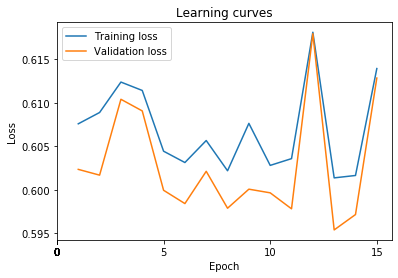

Validation Loss:  0.619
Validation accuracy: 65.0833%


0.6189568860733761

In [13]:
'''
low pass
'''
s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'LogisticRegressionModel'
path         = './results/'

lr_model = LinearRegression(nn).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))
    
choice = ['low_pass', 'band_pass', 'high_pass']

train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   choice = 'low_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.5,
         predicter=torch.nn.Sigmoid(),
         validation=False,
        choice = 'low_pass')

Epoch:  1
Training loss: 0.6679


Training Loss:  0.6572
Training accuracy: 59.8439%


Validation Loss:  0.6562
Validation accuracy: 60.0167%
"Best Loss": 0.656237542629242

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.656


Training Loss:  0.6552
Training accuracy: 59.1051%


Validation Loss:  0.6545
Validation accuracy: 59.5083%
"Best Loss": 0.6544950617120624

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6504


Training Loss:  0.6466
Training accuracy: 62.1299%


Validation Loss:  0.6441
Validation accuracy: 62.5583%
"Best Loss": 0.6440623072867702

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.6476


Training Loss:  0.6443
Training accuracy: 62.5521%


Validation Loss:  0.642
Validation accuracy: 62.4667%
"Best Loss": 0.6419933894847304

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.645


Training Loss:  0.6439
Training accuracy: 62.2549%


Validation Loss:  0.6424
Validation accuracy: 62.3667%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.6428


Training Loss:  0.6387
Training accuracy: 63.6742%


Validation Loss:  0.6364
Validation accuracy: 63.7583%
"Best Loss": 0.6364407057457784

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.6386


Training Loss:  0.6368
Training accuracy: 65.3464%


Validation Loss:  0.6347
Validation accuracy: 65.7167%
"Best Loss": 0.6346707851328746

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.6354


Training Loss:  0.6285
Training accuracy: 64.2825%


Validation Loss:  0.6274
Validation accuracy: 64.6250%
"Best Loss": 0.6273907327905615

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.6325


Training Loss:  0.6245
Training accuracy: 65.9352%


Validation Loss:  0.6231
Validation accuracy: 66.2417%
"Best Loss": 0.6230680073829405

Validation Loss has gone up 0 times.



Epoch:  10
Training loss: 0.6298


Training Loss:  0.6254
Training accuracy: 64.2131%


Validation Loss:  0.6249
Validation accuracy: 64.0750%
Validation Loss has gone up 1 times.



Epoch:  11
Training loss: 0.6289


Training Loss:  0.62
Training accuracy: 66.6491%


Validation Loss:  0.6185
Validation accuracy: 67.0250%
"Best Loss": 0.618542011113877

Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.6247


Training Loss:  0.6285
Training accuracy: 64.9353%


Validation Loss:  0.6264
Validation accuracy: 65.2333%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.6243


Training Loss:  0.6197
Training accuracy: 65.8602%


Validation Loss:  0.6178
Validation accuracy: 66.2083%
"Best Loss": 0.6178034455218213

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.6236


Training Loss:  0.6167
Training accuracy: 66.0241%


Validation Loss:  0.6159
Validation accuracy: 66.4667%
"Best Loss": 0.6159171785445926

Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.624


Training Loss:  0.6201
Training accuracy: 65.6102%


Validation Loss:  0.6188
Validation accuracy: 66.0083%
Validation Loss has gone up 1 times.



Epoch:  16
Training loss: 0.623


Training Loss:  0.6337
Training accuracy: 64.5797%


Validation Loss:  0.6335
Validation accuracy: 64.3750%
Validation Loss has gone up 2 times.



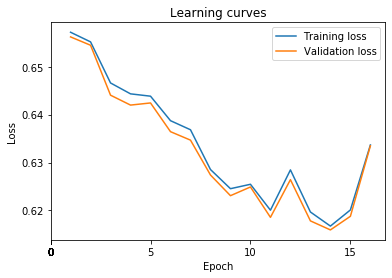

Validation Loss:  0.6389
Validation accuracy: 64.0667%


0.6389449194390723

In [14]:
'''
band pass
'''

s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'LogisticRegressionModel'
path         = './results/'

lr_model = LinearRegression(nn).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))
    
choice = ['low_pass', 'band_pass', 'high_pass']

train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   choice = 'band_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.5,
         predicter=torch.nn.Sigmoid(),
         validation=False,
        choice = 'band_pass')

Epoch:  1
Training loss: 0.5613


Training Loss:  0.5411
Training accuracy: 73.4848%


Validation Loss:  0.541
Validation accuracy: 73.7000%
"Best Loss": 0.5410221035176134

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.5346


Training Loss:  0.5275
Training accuracy: 74.4181%


Validation Loss:  0.5276
Validation accuracy: 74.2500%
"Best Loss": 0.5275648480400127

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.5287


Training Loss:  0.5332
Training accuracy: 73.6654%


Validation Loss:  0.5322
Validation accuracy: 73.2250%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.5219


Training Loss:  0.517
Training accuracy: 74.9431%


Validation Loss:  0.515
Validation accuracy: 75.0417%
"Best Loss": 0.5150166147566858

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.5163


Training Loss:  0.5145
Training accuracy: 74.9708%


Validation Loss:  0.5125
Validation accuracy: 74.7833%
"Best Loss": 0.5125017562445174

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.5138


Training Loss:  0.5112
Training accuracy: 75.6680%


Validation Loss:  0.508
Validation accuracy: 76.0000%
"Best Loss": 0.5080425793186145

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.5104


Training Loss:  0.5063
Training accuracy: 75.4902%


Validation Loss:  0.5039
Validation accuracy: 75.6417%
"Best Loss": 0.5039456106246786

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.5087


Training Loss:  0.5067
Training accuracy: 75.4986%


Validation Loss:  0.5029
Validation accuracy: 75.3917%
"Best Loss": 0.5028984828832299

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.5083


Training Loss:  0.4994
Training accuracy: 76.1374%


Validation Loss:  0.4981
Validation accuracy: 76.4000%
"Best Loss": 0.49814681423471335

Validation Loss has gone up 0 times.



Epoch:  10
Training loss: 0.5038


Training Loss:  0.5145
Training accuracy: 75.4097%


Validation Loss:  0.5092
Validation accuracy: 76.1583%
Validation Loss has gone up 1 times.



Epoch:  11
Training loss: 0.5056


Training Loss:  0.5025
Training accuracy: 75.2986%


Validation Loss:  0.4981
Validation accuracy: 75.9333%
"Best Loss": 0.4981161118187803

Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.504


Training Loss:  0.5036
Training accuracy: 75.4486%


Validation Loss:  0.5001
Validation accuracy: 75.5833%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.5014


Training Loss:  0.4947
Training accuracy: 76.2291%


Validation Loss:  0.4918
Validation accuracy: 76.9917%
"Best Loss": 0.4918105250343363

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.5017


Training Loss:  0.4954
Training accuracy: 76.5152%


Validation Loss:  0.4924
Validation accuracy: 77.0667%
Validation Loss has gone up 1 times.



Epoch:  15
Training loss: 0.4981


Training Loss:  0.5084
Training accuracy: 75.1180%


Validation Loss:  0.507
Validation accuracy: 75.0667%
Validation Loss has gone up 2 times.



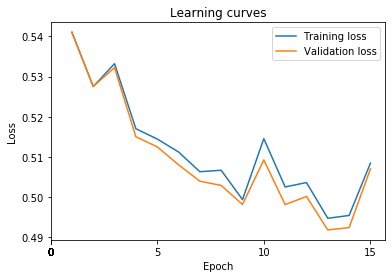

Validation Loss:  0.5085
Validation accuracy: 74.4833%


0.5085330272608617

In [15]:
'''
high pass
'''

s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'LogisticRegressionModel'
path         = './results/'

lr_model = LinearRegression(nn).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))
    
choice = ['low_pass', 'band_pass', 'high_pass']

train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   choice = 'high_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.5,
         predicter=torch.nn.Sigmoid(),
         validation=False,
        choice = 'high_pass')

In [5]:
trn_dl, val_dl, tst_dl = get_dataloaders(dataset=DeepFakeHDF5Dataset_SVM())

In [26]:
s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'SVMModel'
path         = './results'

svm_model = SVM(182).to(device)
criterion = torch.nn.SoftMarginLoss()
optimizer = torch.optim.SGD(svm_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    svm_model.load_state_dict(torch.load(''))

In [28]:
def svm_lbls(T):
    T[torch.nonzero((T < 0.0))] = 0
    return T

train_losses, valid_losses = train(svm_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   acc_thresh=0.0,
                                   label_transform=svm_lbls,
                                   predicter=nn.Tanh())

Epoch:  1
Training loss: 0.5059


Training Loss:  0.4889
Training accuracy: 76.3041%


Validation Loss:  0.4942
Validation accuracy: 75.8250%
"Best Loss": 0.49421626234308186

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.4944


Training Loss:  0.4807
Training accuracy: 76.9430%


Validation Loss:  0.4835
Validation accuracy: 76.6000%
"Best Loss": 0.48345110422753274

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.4876


Training Loss:  0.4752
Training accuracy: 77.3457%


Validation Loss:  0.4781
Validation accuracy: 76.9083%
"Best Loss": 0.47805628212208445

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.4861


Training Loss:  0.4806
Training accuracy: 76.5485%


Validation Loss:  0.4847
Validation accuracy: 76.2083%
Validation Loss has gone up 1 times.



Epoch:  5
Training loss: 0.484


Training Loss:  0.5259
Training accuracy: 72.6737%


Validation Loss:  0.5351
Validation accuracy: 72.2750%
Validation Loss has gone up 2 times.



In [29]:
test_losses = []
evaluate(svm_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         label_transform=svm_lbls,
         predicter=nn.Tanh(),
         validation=False)

Validation Loss:  0.5209
Validation accuracy: 73.2000%


0.5209310406700096

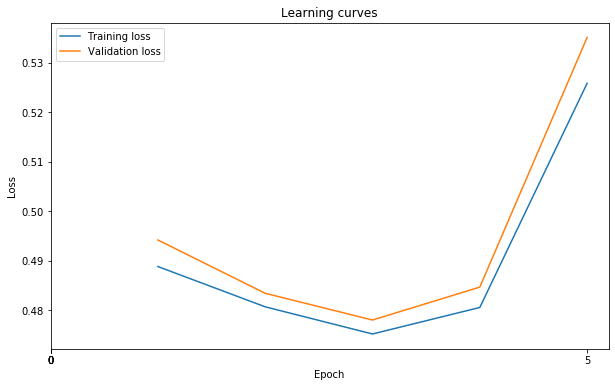

In [30]:
epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

Epoch:  1
Training loss: 0.6252


Training Loss:  0.6212
Training accuracy: 64.5547%


Validation Loss:  0.6174
Validation accuracy: 64.6000%
"Best Loss": 0.6174027507609515

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.609


Training Loss:  0.6058
Training accuracy: 68.5129%


Validation Loss:  0.5985
Validation accuracy: 69.3583%
"Best Loss": 0.5984594840952692

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6069


Training Loss:  0.6073
Training accuracy: 68.5934%


Validation Loss:  0.5992
Validation accuracy: 69.5417%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.6088


Training Loss:  0.6035
Training accuracy: 68.0934%


Validation Loss:  0.5961
Validation accuracy: 68.6167%
"Best Loss": 0.5961128688873129

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.6078


Training Loss:  0.6073
Training accuracy: 66.8796%


Validation Loss:  0.6008
Validation accuracy: 67.4917%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.6071


Training Loss:  0.6086
Training accuracy: 68.6045%


Validation Loss:  0.6003
Validation accuracy: 69.3417%
Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.606


Training Loss:  0.6033
Training accuracy: 68.3351%


Validation Loss:  0.5954
Validation accuracy: 68.9167%
"Best Loss": 0.5954465612452079

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.6077


Training Loss:  0.6074
Training accuracy: 66.9324%


Validation Loss:  0.6006
Validation accuracy: 67.3333%
Validation Loss has gone up 1 times.



Epoch:  9
Training loss: 0.6066


Training Loss:  0.6019
Training accuracy: 68.5156%


Validation Loss:  0.5943
Validation accuracy: 69.0250%
"Best Loss": 0.5943059420332

Validation Loss has gone up 0 times.



Epoch:  10
Training loss: 0.6072


Training Loss:  0.6093
Training accuracy: 66.6185%


Validation Loss:  0.6024
Validation accuracy: 67.2167%
Validation Loss has gone up 1 times.



Epoch:  11
Training loss: 0.6079


Training Loss:  0.6091
Training accuracy: 68.5129%


Validation Loss:  0.6007
Validation accuracy: 69.4667%
Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.6067


Training Loss:  0.6044
Training accuracy: 67.5935%


Validation Loss:  0.5976
Validation accuracy: 67.8917%
Validation Loss has gone up 0 times.



Epoch:  13
Training loss: 0.6058


Training Loss:  0.61
Training accuracy: 66.5713%


Validation Loss:  0.6026
Validation accuracy: 66.8167%
Validation Loss has gone up 1 times.



Epoch:  14
Training loss: 0.6054


Training Loss:  0.6071
Training accuracy: 68.8073%


Validation Loss:  0.599
Validation accuracy: 69.4417%
Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.6052


Training Loss:  0.6018
Training accuracy: 68.7101%


Validation Loss:  0.5934
Validation accuracy: 69.4417%
"Best Loss": 0.5934405688275681

Validation Loss has gone up 0 times.



Epoch:  16
Training loss: 0.6052


Training Loss:  0.6023
Training accuracy: 68.2268%


Validation Loss:  0.5953
Validation accuracy: 68.6667%
Validation Loss has gone up 1 times.



Epoch:  17
Training loss: 0.6033


Training Loss:  0.6164
Training accuracy: 67.8907%


Validation Loss:  0.6073
Validation accuracy: 68.7750%
Validation Loss has gone up 2 times.



Validation Loss:  0.6227
Validation accuracy: 67.0833%


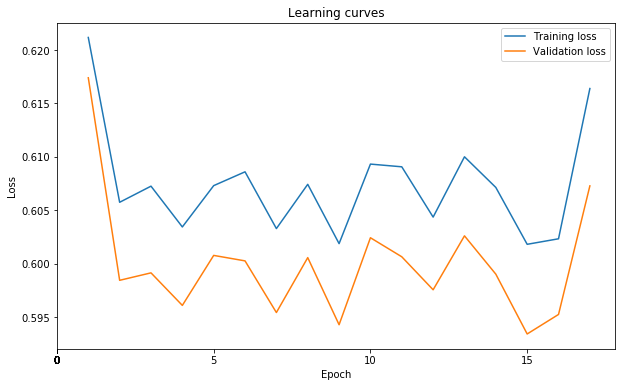

In [7]:
'''
low pass
'''

s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'SVMModel'
path         = './results'

svm_model = SVM(nn).to(device)
criterion = torch.nn.SoftMarginLoss()
optimizer = torch.optim.SGD(svm_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    svm_model.load_state_dict(torch.load(''))
    
def svm_lbls(T):
    T[torch.nonzero((T < 0.0))] = 0
    return T

train_losses, valid_losses = train(svm_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   acc_thresh=0.0,
                                   label_transform=svm_lbls,
                                   predicter=nn.Tanh(),
                                  choice = 'low_pass')
test_losses = []
evaluate(svm_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         label_transform=svm_lbls,
         predicter=nn.Tanh(),
         validation=False,
        choice = 'low_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

Epoch:  1
Training loss: 0.6681


Training Loss:  0.658
Training accuracy: 59.6217%


Validation Loss:  0.657
Validation accuracy: 59.3167%
"Best Loss": 0.6570053519086637

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.6551


Training Loss:  0.6524
Training accuracy: 61.1049%


Validation Loss:  0.6506
Validation accuracy: 61.2833%
"Best Loss": 0.6506097646469767

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6492


Training Loss:  0.6485
Training accuracy: 60.4716%


Validation Loss:  0.6467
Validation accuracy: 60.5000%
"Best Loss": 0.6467382584480531

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.6461


Training Loss:  0.6425
Training accuracy: 63.3743%


Validation Loss:  0.6405
Validation accuracy: 63.8750%
"Best Loss": 0.6405202746391299

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.6419


Training Loss:  0.644
Training accuracy: 60.8800%


Validation Loss:  0.644
Validation accuracy: 61.0167%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.6411


Training Loss:  0.6342
Training accuracy: 65.1714%


Validation Loss:  0.6324
Validation accuracy: 65.4417%
"Best Loss": 0.6324396723128379

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.6364


Training Loss:  0.632
Training accuracy: 64.6409%


Validation Loss:  0.6304
Validation accuracy: 64.9750%
"Best Loss": 0.6303909560467338

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.6341


Training Loss:  0.63
Training accuracy: 65.0353%


Validation Loss:  0.6274
Validation accuracy: 65.5667%
"Best Loss": 0.6273759191340589

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.6284


Training Loss:  0.6328
Training accuracy: 64.1909%


Validation Loss:  0.6303
Validation accuracy: 64.7583%
Validation Loss has gone up 1 times.



Epoch:  10
Training loss: 0.6267


Training Loss:  0.621
Training accuracy: 65.7936%


Validation Loss:  0.6203
Validation accuracy: 65.5167%
"Best Loss": 0.6203396948094063

Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.6233


Training Loss:  0.6169
Training accuracy: 66.8824%


Validation Loss:  0.6153
Validation accuracy: 67.4083%
"Best Loss": 0.6153124450369086

Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.627


Training Loss:  0.6398
Training accuracy: 64.4020%


Validation Loss:  0.6373
Validation accuracy: 64.9000%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.6237


Training Loss:  0.6391
Training accuracy: 62.9715%


Validation Loss:  0.6372
Validation accuracy: 62.9000%
Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.6224


Training Loss:  0.6142
Training accuracy: 66.4519%


Validation Loss:  0.6126
Validation accuracy: 66.4833%
"Best Loss": 0.6126396909673165

Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.6253


Training Loss:  0.6172
Training accuracy: 66.7796%


Validation Loss:  0.6149
Validation accuracy: 67.1667%
Validation Loss has gone up 1 times.



Epoch:  16
Training loss: 0.6191


Training Loss:  0.6133
Training accuracy: 66.8241%


Validation Loss:  0.6116
Validation accuracy: 67.2500%
"Best Loss": 0.6116071888741025

Validation Loss has gone up 0 times.



Epoch:  17
Training loss: 0.6228


Training Loss:  0.6203
Training accuracy: 65.9102%


Validation Loss:  0.6183
Validation accuracy: 65.9583%
Validation Loss has gone up 1 times.



Epoch:  18
Training loss: 0.6191


Training Loss:  0.6271
Training accuracy: 65.3936%


Validation Loss:  0.6248
Validation accuracy: 65.5667%
Validation Loss has gone up 2 times.



Validation Loss:  0.6309
Validation accuracy: 64.5417%


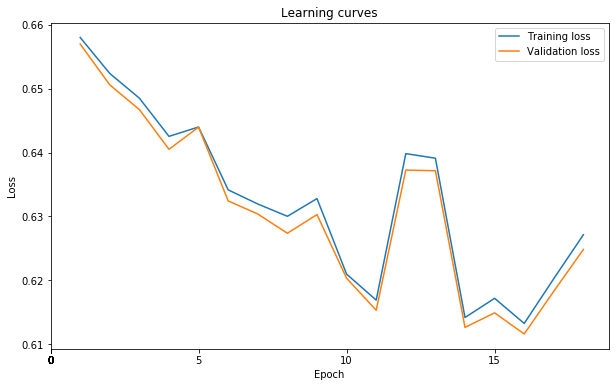

In [8]:
'''
band pass
'''

s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'SVMModel'
path         = './results'

svm_model = SVM(nn).to(device)
criterion = torch.nn.SoftMarginLoss()
optimizer = torch.optim.SGD(svm_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    svm_model.load_state_dict(torch.load(''))
    
def svm_lbls(T):
    T[torch.nonzero((T < 0.0))] = 0
    return T

train_losses, valid_losses = train(svm_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   acc_thresh=0.0,
                                   label_transform=svm_lbls,
                                   predicter=nn.Tanh(),
                                  choice = 'band_pass')
test_losses = []
evaluate(svm_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         label_transform=svm_lbls,
         predicter=nn.Tanh(),
         validation=False,
        choice = 'band_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

Epoch:  1
Training loss: 0.5582


Training Loss:  0.5335
Training accuracy: 74.1070%


Validation Loss:  0.5371
Validation accuracy: 73.5750%
"Best Loss": 0.5370613514108864

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.53


Training Loss:  0.5479
Training accuracy: 72.7793%


Validation Loss:  0.549
Validation accuracy: 72.3417%
Validation Loss has gone up 1 times.



Epoch:  3
Training loss: 0.5231


Training Loss:  0.5188
Training accuracy: 74.5292%


Validation Loss:  0.5209
Validation accuracy: 74.3000%
"Best Loss": 0.520895466525504

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.5178


Training Loss:  0.513
Training accuracy: 75.2319%


Validation Loss:  0.5132
Validation accuracy: 75.1833%
"Best Loss": 0.5132116294921715

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.514


Training Loss:  0.5099
Training accuracy: 75.4958%


Validation Loss:  0.5114
Validation accuracy: 75.4083%
"Best Loss": 0.5114462220288336

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.5096


Training Loss:  0.5056
Training accuracy: 75.4208%


Validation Loss:  0.5085
Validation accuracy: 75.1083%
"Best Loss": 0.5085436305467116

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.5061


Training Loss:  0.5058
Training accuracy: 75.5764%


Validation Loss:  0.5086
Validation accuracy: 75.2333%
Validation Loss has gone up 1 times.



Epoch:  8
Training loss: 0.5046


Training Loss:  0.4982
Training accuracy: 75.9402%


Validation Loss:  0.5015
Validation accuracy: 75.8167%
"Best Loss": 0.501499263530082

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.5031


Training Loss:  0.5075
Training accuracy: 75.5708%


Validation Loss:  0.5089
Validation accuracy: 75.3167%
Validation Loss has gone up 1 times.



Epoch:  10
Training loss: 0.4987


Training Loss:  0.509
Training accuracy: 74.3514%


Validation Loss:  0.5119
Validation accuracy: 74.7083%
Validation Loss has gone up 2 times.



Validation Loss:  0.5183
Validation accuracy: 73.7583%


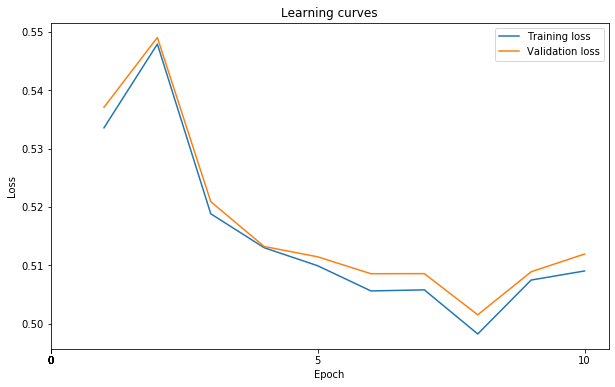

In [9]:
'''
high pass
'''

s_epoch      = 1
num_epochs   = 300
lr_rate      = 1e-2
load_model   = False
model_name   = 'SVMModel'
path         = './results'

svm_model = SVM(nn).to(device)
criterion = torch.nn.SoftMarginLoss()
optimizer = torch.optim.SGD(svm_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    svm_model.load_state_dict(torch.load(''))
    
def svm_lbls(T):
    T[torch.nonzero((T < 0.0))] = 0
    return T

train_losses, valid_losses = train(svm_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   acc_thresh=0.0,
                                   label_transform=svm_lbls,
                                   predicter=nn.Tanh(),
                                  choice = 'high_pass')
test_losses = []
evaluate(svm_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         label_transform=svm_lbls,
         predicter=nn.Tanh(),
         validation=False,
        choice = 'high_pass')

epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [10]:
full_dataloader = get_dataloaders(dataset=DeepFakeHDF5Dataset(), full_dataset=True)

In [11]:
(x, y) = next(iter(full_dataloader))
print(x.shape)

torch.Size([60002, 182])


In [16]:
# Manual Standardization
from models import KMeans
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
cl, c = KMeans().run(X, K=2, Niter=50)

K-means example with 60,002 points in dimension 182, K = 2:
Timing for 50 iterations: 103.14213s = 50 x 2.06284s



In [17]:
print(cl.size())
print(c.size())
y = y.squeeze(-1).long()
print(y.size())
print(cl)
print(y)
sub = (cl - y)
print(sub)
print(sub.size())
print(cl == y)
accuracy = 1 - torch.mean((cl == y).float())
print("Accuracy: %f or %f " % (accuracy, (1-accuracy)))

torch.Size([60002])
torch.Size([2, 182])
torch.Size([60002])
tensor([0, 1, 1,  ..., 1, 1, 0])
tensor([1, 0, 1,  ..., 0, 0, 0])
tensor([-1,  1,  0,  ...,  1,  1,  0])
torch.Size([60002])
tensor([False, False,  True,  ..., False, False,  True])
Accuracy: 0.521216 or 0.478784 


In [18]:
# data
(x, y) = next(iter(full_dataloader))
data_size, dims, num_clusters = x.size(0), 2, 2
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=X, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

[running kmeans]: 1it [00:00,  5.89it/s, center_shift=9194.229492, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 14it [00:02,  5.71it/s, center_shift=0.000000, iteration=14, tol=0.000100] 


In [19]:

print(cluster_ids_x.size())
print(cluster_ids_x)
y = y.squeeze(-1).long()
accuracy = torch.mean((cluster_ids_x == y).float())
print("Accuracy: %f or %f " % (accuracy, (1-accuracy)))

torch.Size([60002])
tensor([0, 1, 1,  ..., 1, 0, 0])
Accuracy: 0.478767 or 0.521233 


In [20]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
Y = y.squeeze(-1).numpy()
print(Y.shape)
print(labels.shape)
res =labels+Y
cont=0
print(res.shape)
for z in range(len(res)):
    if res[z] == 1:
        cont+=1
print("Average KM: " + str(1-cont/len(res)) + " or " + str(cont/len(res)))

(60002,)
(60002,)
(60002,)
Average KM: 0.4787673744208526 or 0.5212326255791474


In [28]:
'''
low pass
'''
from models import KMeans
from kmeans_pytorch import kmeans

(x, y) = next(iter(full_dataloader))
print(x.shape)
nn = int(x.shape[1]/3)

x = x[:, :nn]
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
cl, c = KMeans().run(X, K=2, Niter=50)
y = y.squeeze(-1).long()
sub = (cl - y)
accuracy = 1 - torch.mean((cl == y).float())

# data
(x, y) = next(iter(full_dataloader))
data_size, dims, num_clusters = x.size(0), 2, 2
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=X, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

y = y.squeeze(-1).long()
accuracy = torch.mean((cluster_ids_x == y).float())
print("Accuracy: %f or %f " % (accuracy, (1-accuracy)))

torch.Size([60002, 182])
K-means example with 60,002 points in dimension 60, K = 2:
Timing for 50 iterations: 34.65564s = 50 x 0.69311s



[running kmeans]: 1it [00:00,  8.90it/s, center_shift=13142.171875, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 15it [00:02,  5.96it/s, center_shift=0.000000, iteration=15, tol=0.000100]  

Accuracy: 0.478784 or 0.521216 


In [33]:
'''
band pass
'''
from models import KMeans
from kmeans_pytorch import kmeans

(x, y) = next(iter(full_dataloader))
print(x.shape, y.shape)
nn = int(x.shape[1]/3)

x = x[:, nn:2*nn]
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
cl, c = KMeans().run(X, K=2, Niter=50)
y = y.squeeze(-1).long()
sub = (cl - y)
accuracy = 1 - torch.mean((cl == y).float())

# data
(x, y) = next(iter(full_dataloader))
data_size, dims, num_clusters = x.size(0), 2, 2
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=X, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

y = y.squeeze(-1).long()
accuracy = torch.mean((cluster_ids_x == y).float())
print("Accuracy: %f or %f " % (accuracy, (1-accuracy)))

torch.Size([60002, 182]) torch.Size([60002, 1])
K-means example with 60,002 points in dimension 60, K = 2:
Timing for 50 iterations: 34.25104s = 50 x 0.68502s



[running kmeans]: 1it [00:00,  8.22it/s, center_shift=11711.589844, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 15it [00:02,  6.22it/s, center_shift=0.000000, iteration=15, tol=0.000100]  

Accuracy: 0.478767 or 0.521233 


In [34]:
'''
high pass
'''
(x, y) = next(iter(full_dataloader))
print(x.shape)
nn = int(x.shape[1]/3)

x = x[:, x.shape[1]-nn:]
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
cl, c = KMeans().run(X, K=2, Niter=50)
y = y.squeeze(-1).long()
sub = (cl - y)
accuracy = 1 - torch.mean((cl == y).float())

# data
(x, y) = next(iter(full_dataloader))
data_size, dims, num_clusters = x.size(0), 2, 2
mu = torch.mean(x, dim=1).unsqueeze(-1)
std = 1
X = (x.sub(other=mu))/std
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=X, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

y = y.squeeze(-1).long()
accuracy = torch.mean((cluster_ids_x == y).float())
print("Accuracy: %f or %f " % (accuracy, (1-accuracy)))

torch.Size([60002, 182])
K-means example with 60,002 points in dimension 60, K = 2:
Timing for 50 iterations: 34.04984s = 50 x 0.68100s



[running kmeans]: 1it [00:00,  5.82it/s, center_shift=10654.470703, iteration=1, tol=0.000100]

running k-means on cuda:0..


[running kmeans]: 12it [00:02,  5.71it/s, center_shift=0.000000, iteration=12, tol=0.000100]  

Accuracy: 0.521233 or 0.478767 


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pickle

# num = 5
# LR = 0
# SVM = 0
# SVM_r = 0
# SVM_p = 0


# for z in range(num):
#     # read python dict back from the file
#     data = None
#     lbls = None
#     og_d = None
#     with h5py.File(fhq_hdf5_pt, 'r') as hdf5_file: 
#         data = hdf5_file['fft_data'][:]
#         lbls = hdf5_file['lbl_data'][:]
#         og_d = hdf5_file['orgn_data'][:]

#     X = data 
#     y = lbls 


#     try:

#         from sklearn.model_selection import train_test_split
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#         from sklearn.svm import SVC
#         svclassifier = SVC(kernel='linear')
#         svclassifier.fit(X_train, y_train)
#         #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
               
#         from sklearn.svm import SVC
#         svclassifier_r = SVC(C=3.1, kernel='rbf', gamma=0.00002)
#         svclassifier_r.fit(X_train, y_train)
#         #print('Accuracy on test set: {:.3f}'.format(svclassifier_r.score(X_test, y_test)))
                
#         from sklearn.svm import SVC
#         svclassifier_p = SVC(kernel='poly')
#         svclassifier_p.fit(X_train, y_train)
#         #print('Accuracy on test set: {:.3f}'.format(svclassifier_p.score(X_test, y_test)))
        
#         from sklearn.linear_model import LogisticRegression
#         logreg = LogisticRegression(solver='liblinear', max_iter=1000)
#         logreg.fit(X_train, y_train)
#         #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

        
#         SVM+=svclassifier.score(X_test, y_test)
#         SVM_r+=svclassifier_r.score(X_test, y_test)
#         SVM_p+=svclassifier_p.score(X_test, y_test)
#         LR+=logreg.score(X_test, y_test)

 
#     except:
#         num-=1
#         print(num)
    
# print("Average SVM: "+str(SVM/num))
# print("Average SVM_r: "+str(SVM_r/num))
# print("Average SVM_p: "+str(SVM_p/num))
# print("Average LR: "+str(LR/num))